# Test Set

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from my_measures import BinaryClassificationPerformance
%matplotlib inline
from tqdm import tqdm

### Read raw test data

In [4]:
amazon = pd.read_csv('/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/amazon_data/raw_data_test.csv')

print(amazon.shape)

(91000, 14)


In [5]:
print(amazon.loc[0, "Text"])

strong taste but good! In my opinion it's not exactly a substitute for coffee but tastes really good mixed together.


In [6]:
print(amazon.head())
print(amazon['helpful'].mean())

   Unnamed: 0  Unnamed: 0.1      Id   ProductId          UserId  \
0      207103        112082  112083  B002Y2QT2K  A22Y5TJPN98DWB   
1      139933        224640  224641  B009D53XKC  A3MDY6Y3Z6D649   
2       76100        399707  399708  B005GIF5WY  A3LCQXQ4SFYBAU   
3      114178        567900  567901  B005K4Q68Q  A2E65ZXD654761   
4      285272        263134  263135  B002WW3BW8  A1XAZ0MR4TRY16   

                  ProfileName  HelpfulnessNumerator  HelpfulnessDenominator  \
0                Eva Juergens                     1                       1   
1  The Man Behind the Curtain                     1                       1   
2                  Johna Jane                     0                       0   
3                   Barbara L                     0                       0   
4                        bfn1                     0                       0   

   Score        Time                          Summary  \
0      3  1339286400                 chicory "coffee"   
1      5

### Lemmatization 

#### Important : Gensim lemmatization requires Python version 3.6 and ‘pattern’ package is installed.

In [7]:
#Lemmatization 
from gensim.utils import lemmatize
print('**************************************************')
amaLemma=[]
for w in tqdm(amazon['Text']):
    amaLemma.append([wd.decode('utf-8').split('/')[0] for wd in lemmatize(w)])

  0%|          | 0/91000 [00:00<?, ?it/s]

**************************************************


100%|██████████| 91000/91000 [11:34<00:00, 130.99it/s]


In [21]:
amaNp=np.array(amaLemma)
amaDF=pd.DataFrame(amaNp)

amaDF.to_csv('/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/amazon_data/AmazonLemmatizedTestingwithStopWords.csv')
print(amaDF)

                                                       0
0      [strong, taste, good, opinion, not, exactly, s...
1      [search, high, low, salt, change, life, end, j...
2      [treat, be, picky, cat, favorite, ve, try, dif...
3      [price, be, fantastic, taste, so, convenient, ...
4      [alot, chocolate, not, so, much, coffee, bean,...
5      [look, ingredient, water, wheat, salt, sugar, ...
6      [love, love, bread, mix, person, be, raise, ea...
7      [country, choice, brand, be, domestically, pro...
8      [taste, good, easy, prepare, separate, pouch, ...
9      [only, recently, have, discover, satisy, inter...
10     [always, enjoy, tazo, tea, earl, grey, be, fav...
11     [be, skeptical, sister, tell, drug, rep, have,...
12     [have, grand, kid, fall, play, ground, equipme...
13     [guess, get, title, wrong, be, food, left, be,...
14     [buy, mini, buster, cube, miniature, dachshund...
15     [ll, confess, know, little, different, coffee,...
16     [be, thrill, find, flavo

In [22]:
#JOIN LIST TO STR

amaDFOut = amaDF[0].apply(' '.join)
print(amaDFOut.head())


0    strong taste good opinion not exactly substitu...
1    search high low salt change life end journey m...
2    treat be picky cat favorite ve try different b...
3    price be fantastic taste so convenient make me...
4    alot chocolate not so much coffee bean not big...
Name: 0, dtype: object


### Feature extraction on natural language data

In [23]:
# # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# corpus = amazon.Text.as_matrix()
# X_bag_of_words = vectorizer.fit_transform(corpus)
# print(X_bag_of_words.toarray())
hv = joblib.load('vectorizer.pkl')
X_hv = hv.transform(amaDFOut)
print(X_hv.shape)

(91000, 76362)


In [24]:
# # vectorize Bag of Words from review text; as sparse matrix
# # from sklearn.feature_extraction.text import HashingVectorizer
# # hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
# hv = joblib.load('hv.pkl')
# #X_hv = hv.transform(amazon.Text)
# X_hv = hv.transform(amaDFOut)
# print(X_hv.shape)
# # print(hv.shape)

In [25]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
# from sklearn.feature_extraction.text import TfidfTransformer
# transformer = TfidfTransformer()
transformer = joblib.load('transformer.pkl')
X_tfidf = transformer.transform(X_hv)

In [26]:
print(type(X_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


### Time Converting 

In [27]:
# converting time for extral feature
import datetime

amazon['amaRead'] = amazon['Time'].apply(datetime.datetime.fromtimestamp)
amazon['amaHour'] = amazon['amaRead'].apply(datetime.datetime.strftime, format=("%H"))
amazon['amaHour'] = amazon['amaHour'].apply(int)
amazon['amaDay'] =amazon['amaRead'].apply(datetime.datetime.weekday)

print(amazon['amaHour'].head(10))
print(amazon['amaDay'].head(10))

0    20
1    19
2    20
3    20
4    20
5    20
6    20
7    19
8    20
9    19
Name: amaHour, dtype: int64
0    5
1    1
2    6
3    1
4    6
5    2
6    0
7    4
8    0
9    6
Name: amaDay, dtype: int64


### Create additional quantitative features

In [28]:
# features from Amazon.csv to add to feature set
# amazon['reviewLen'] = amazon['Text'].str.len()
amazon['reviewLen'] = amaDFOut.str.len()
# X_quant_features = amazon[["Score", "reviewLen"]]
X_quant_features = amazon[["Score", "reviewLen", "Time","amaDay","amaHour"]]


print(X_quant_features.head(10))
print(type(X_quant_features))

   Score  reviewLen        Time  amaDay  amaHour
0      3         88  1339286400       5       20
1      5       1911  1326844800       1       19
2      5         97  1345420800       6       20
3      5        109  1351036800       1       20
4      3         90  1311552000       6       20
5      1        133  1349308800       2       20
6      5        428  1300147200       0       20
7      5        792  1265414400       4       19
8      5         59  1286841600       0       20
9      5        390  1203292800       6       19
<class 'pandas.core.frame.DataFrame'>


### Combine all quantitative features into a single sparse matrix

In [29]:
from scipy.sparse import csr_matrix, hstack
X_quant_features_csr = csr_matrix(X_quant_features)
X_combined = hstack([X_tfidf, X_quant_features_csr])
X_matrix = csr_matrix(X_combined) # convert to sparse matrix
print(X_matrix.shape)

(91000, 76367)


### Create `X`, scaled matrix of features

In [30]:
# feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler(with_mean=False)
sc = joblib.load('sc.pkl')
X = sc.transform(X_matrix)
print(X.shape)

(91000, 76367)


### create `y`, vector of Labels

In [31]:
y = amazon['helpful'].values
print(type(y))

<class 'numpy.ndarray'>


In [32]:
# MODEL: Decision Tree Classifier
# from sklearn import tree
# dtc = tree.DecisionTreeClassifier(max_depth=100)
# dtc.fit(X_matrix, y)
# joblib.dump(dtc, 'dtc.pkl') # pickle
dtc = joblib.load('dtc.pkl')

dtc_performance = BinaryClassificationPerformance(dtc.predict(X_matrix), y, 'dtc')
dtc_performance.compute_measures()
print(dtc_performance.performance_measures)

{'Pos': 6607, 'Neg': 84393, 'TP': 2298, 'TN': 82518, 'FP': 1875, 'FN': 4309, 'Accuracy': 0.9320439560439561, 'Precision': 0.5506829618979152, 'Recall': 0.34781292568487965, 'desc': 'dtc'}


### ROC plot performance of models and fits

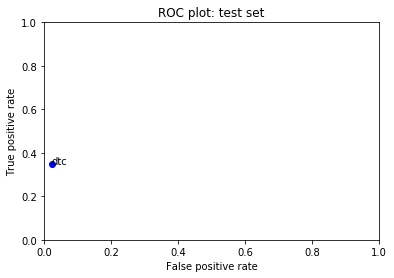

In [34]:
fits = [dtc_performance]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ridge Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [30]:
amazon.loc[0, "Text"]

"strong taste good! In opinion it's exactly substitute coffee tastes good mixed together."

In [31]:
amazon.loc[0, "helpful"]

False

In [32]:
ridge_predictions = rdg.predict(X)

In [33]:
ridge_predictions.shape

(91000,)

In [34]:
print(ridge_predictions)

[False False False ... False False False]


In [35]:
# false positives

import random, time

for i in range(0, len(ridge_predictions)):
    if (ridge_predictions[i] == True):
        if (amazon.loc[i, "helpful"] == False):
            if (random.uniform(0, 1) < 0.05):
                print(i)
                print(time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(amazon.loc[i, "Time"])))
                print(amazon.loc[i, "Score"])
                print(amazon.loc[i, "HelpfulnessDenominator"])
                print(amazon.loc[i, "ProductId"])
                print(amazon.loc[i, "Text"])
                print('* * * * * * * * * ')

7427
2012-09-15 00:00:00
5
1
B003XUHGRO
nice good neat cool great amazing fantastic stupendous exceptional review process complete bore useless. Let Check number Stars leave field optional.
* * * * * * * * * 
7730
2012-06-01 00:00:00
4
0
B007RTR89S
I color-treated (all-over blonde highlights) fine hair... lot it! I originally tried volumizing shampoo condition Clear I needed moisture. This great!<br /><br />Even washing hair manageable, styled better, shiney bright! One guys I work said looked blonder asked I got done!<br /><br />I know sulfate hair looks great anyway!
* * * * * * * * * 
8649
2012-06-11 00:00:00
5
0
B00390T5JA
Simple use, intuitive set up. Makes great coffee tea, provided use preferred brands. Fits kitchen counter, extra space, reservoir holds decent water cup, provide cups guests filling reservoir over. Great item.
* * * * * * * * * 
9863
2011-02-11 00:00:00
4
1
B000FI4O90
I received Aerogarden half weeks ago thrilled it. The reason I given stars I think expensive, pa